# Titanic Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.

### Load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('dataset/titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

The dataset consistof 891 rows and 12 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here we have some column object datatype and some are numerical datatype.

## Exploratory Data Analysis

### Missing Data

In [10]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that in Age ,cabin and Embarked column has null values.

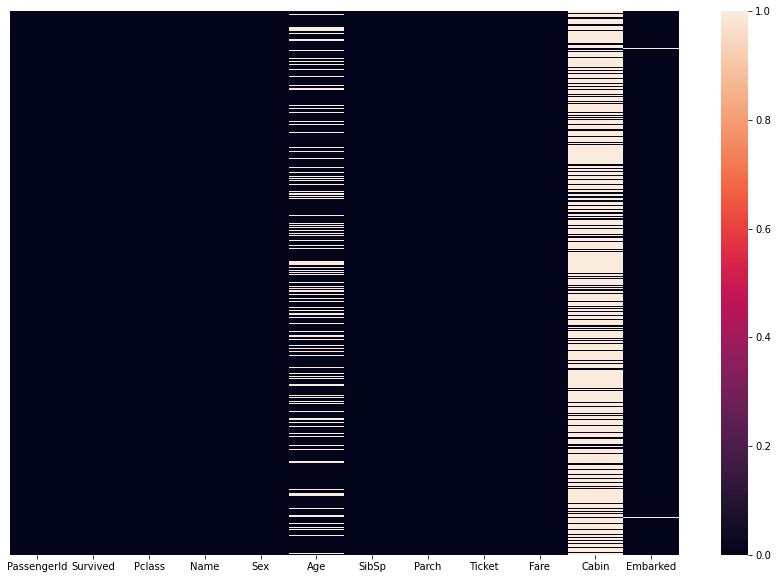

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

Roughly 20 % of the Age data is missing . The proportion of Age missing is likely small enough for reasonable replacement with some from of imputation. Looking at the Cabin column, it looks like we are just missing too much of data to do something useful

In [12]:
#Statistical Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the data-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

<AxesSubplot:xlabel='Survived', ylabel='count'>

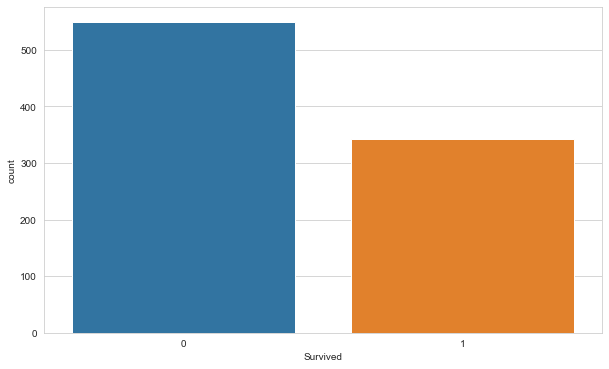

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=df)

Here we can ee that less people survived which is represented as 1 and more people not able survived represented as 0

Let’s take a more detailed look at what data is actually missing:

In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

### Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

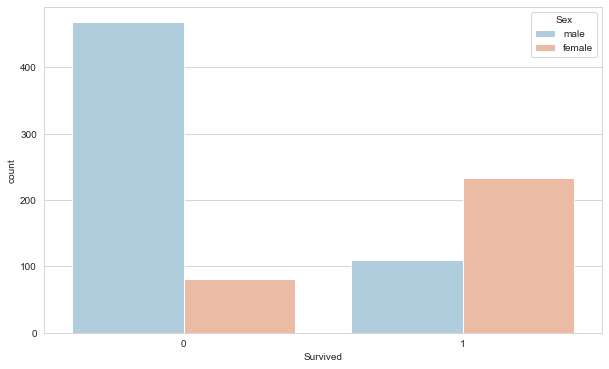

In [15]:
#Let's check acoording to Sex i.e we can differentiate with respect to male and female that, how many people survived
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

Here we can say that most of the people are male who not able to survived with respect to women, while more women survived than male

### Pclass:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

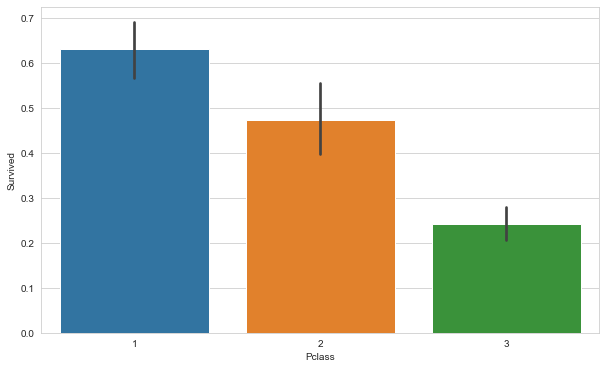

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', data=df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

We will create another pclass plot below.

<Figure size 720x432 with 0 Axes>

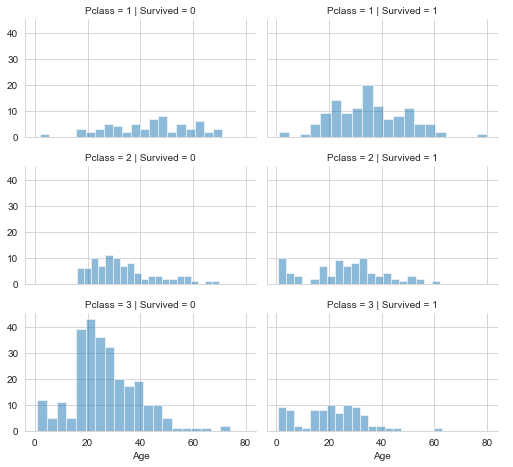

In [18]:
plt.figure(figsize=(10,6))
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

### SibSp

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

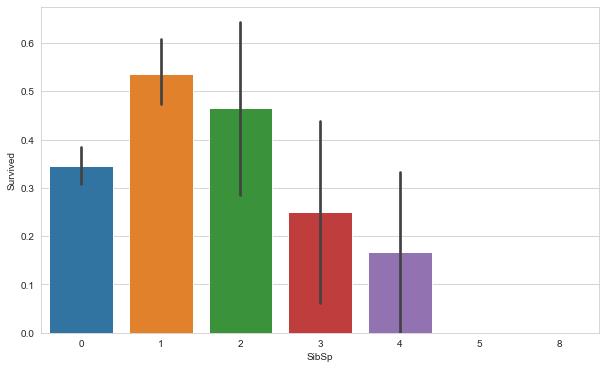

In [19]:
#draw a bar plot for SibSp vs. survival
plt.figure(figsize=(10,6))
sns.barplot(x="SibSp", y="Survived", data=df)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two

### Parch Feature

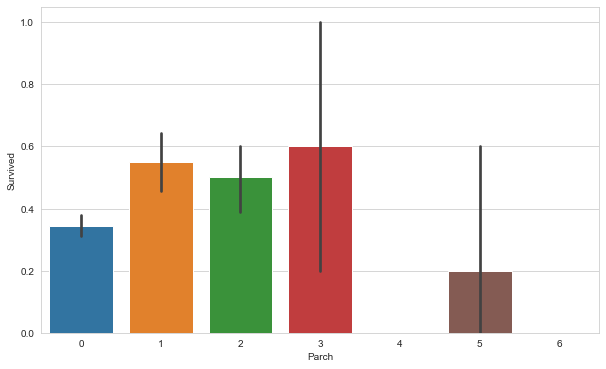

In [20]:
#draw a bar plot for Parch vs. survival
plt.figure(figsize=(10,6))
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

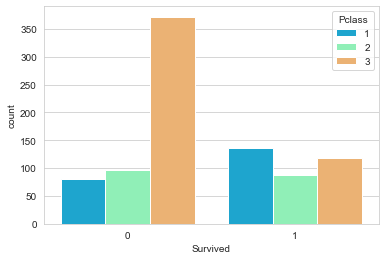

In [21]:
#Let see with respect to  passenger class 
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

Here we can see that there are 3 classes and we see that 3rd class passenger not survived very much with respect to 1st class, while 1st class passenger survived more than the 3rd class in the second part.

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or childre

### Age and Sex

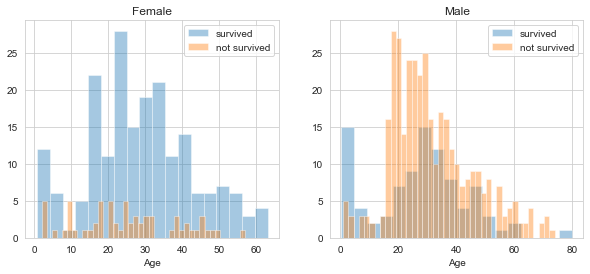

In [22]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Here we can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women.

### Embarked, Pclass and Sex:

<Figure size 720x432 with 0 Axes>

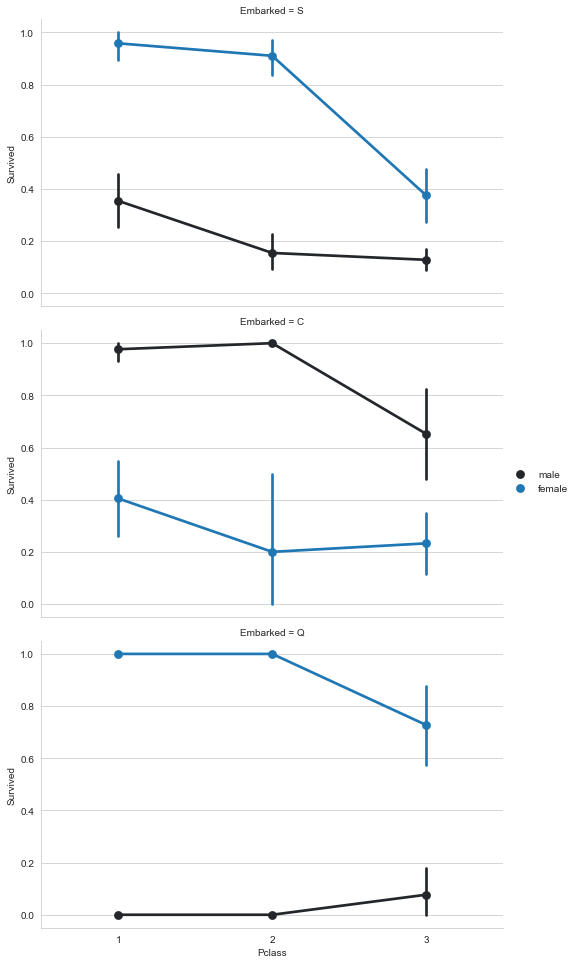

In [23]:
plt.figure(figsize=(10,6))
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

<Figure size 720x432 with 0 Axes>

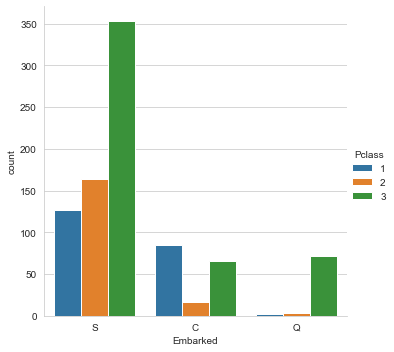

In [24]:
# Now we can make a quick catplot to check out the results, note the x_order argument, used to deal with NaN values
plt.figure(figsize=(10,6))
sns.catplot('Embarked',data=df,hue='Pclass',row_order=['C','Q','S'],kind='count')

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class

Can we capture more of the structure by using Pclass? Here we will bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Let’s break it down by Gender and what Class they were traveling in.

In [25]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.9

ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

Here we can see that female on high class Survived more and male with low class Died more

## Data Preprocessing

First, drop ‘PassengerId’ from the data set, because it does not contribute to a persons survival probability.

In [27]:
df = df.drop(['PassengerId'], axis=1)

## Missing Data:

### Cabin:

we have to deal with Cabin (687), Embarked (2) and Age (177).

In [28]:
df= df.fillna(0)

In [29]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
df['Sex'] = df['Sex'].replace(['female','male'],[0,1])
df['Cabin_mapped'] = df['Cabin'].astype(str).str[0]
# this transforms the letters into numbers
cabin_dict = {k:i for i, k in enumerate(
    df['Cabin_mapped'].unique(),0)}

df.loc[:,'Cabin_mapped'] =  df.loc[:,'Cabin_mapped'].map(cabin_dict)

Replacing the values of male and female to 0 and 1 and also give values to the cabin with respect to its string value

In [31]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_mapped
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S,0
5,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,Q,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,2
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C,0


In [32]:
df = df.drop(['Name','Ticket','Cabin'], 1)

Removing the columns which are less important for the predicting

In [33]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_mapped
0,0,3,1,22.0,1,0,7.2500,S,0
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,0
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,0
5,0,3,1,0.0,0,0,8.4583,Q,0
6,0,1,1,54.0,0,0,51.8625,S,2
7,0,3,1,2.0,3,1,21.0750,S,0
8,1,3,0,27.0,0,2,11.1333,S,0
9,1,2,0,14.0,1,0,30.0708,C,0


### Converting the categorical column into Numerical column

In [34]:
df=pd.get_dummies(df,prefix='Embarked',columns=['Embarked'])

In [35]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_mapped,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,1
5,0,3,1,0.0,0,0,8.4583,0,0,0,1,0
6,0,1,1,54.0,0,0,51.8625,2,0,0,0,1
7,0,3,1,2.0,3,1,21.0750,0,0,0,0,1
8,1,3,0,27.0,0,2,11.1333,0,0,0,0,1
9,1,2,0,14.0,1,0,30.0708,0,0,1,0,0


In [36]:
fname= ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ,'Cabin_mapped', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X= df[fname]
y= df[['Survived']]

In [37]:
X.shape

(891, 10)

In [38]:
y.shape

(891, 1)

## Splitting the data for training & testing

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

In [40]:
x_train ,x_test ,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=43)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 10)
(268, 10)
(623, 1)
(268, 1)


## Random Forest:

In [42]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

## Logistic Regression:

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

## K Nearest Neighbor:

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)

Y_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

## Gaussian Naive Bayes:

In [46]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

## Linear Support Vector Machine:

In [47]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train,y_train) 
decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

### Which is the best Model ?

In [49]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.20,Random Forest
99.20,Decision Tree
83.95,KNN
81.06,Logistic Regression
76.40,Naive Bayes
76.08,Support Vector Machines


As we can see, the RandomForest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

### Cross-Validation

In [50]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.87301587 0.85714286 0.74603175 0.80645161 0.70967742 0.79032258
 0.77419355 0.80645161 0.88709677 0.77419355]
Mean: 0.8024577572964668
Standard Deviation: 0.0535739229143387


Our model has a average accuracy of 80% with a standard deviation of 6 %. The standard deviation shows us, how precise the estimates are . This means in our case that the accuracy of our model can differ + — 6%.

## Hyperparameter Tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}


rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = RandomizedSearchCV(rf, param_dist, n_jobs=-1)
clf.fit(x_train,y_train)
print("Tuned Random forest Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))

Tuned Random forest Parameters: {'n_estimators': 1500, 'min_samples_split': 25, 'min_samples_leaf': 1, 'criterion': 'entropy'}
Best score is 0.8234580645161291


## evaluating using Best Parameteres

In [52]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)

# predicting the results for the test set
y_pred = random_forest.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, y_pred))
#Confusion_matrx
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7910447761194029
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       164
           1       0.79      0.62      0.70       104

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268

[[147  17]
 [ 39  65]]


## ROC AUC Curve

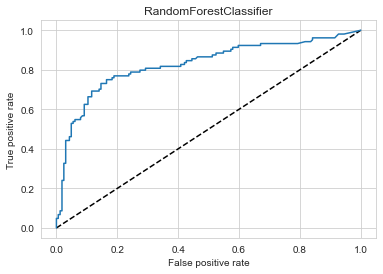

In [53]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
y_pred_prob = random_forest.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,random_forest.predict(x_test))

print("ROC-AUC-Score:", auc_score)

ROC-AUC-Score: 0.760670731707317


The final model has an accuracy 80% with auc roc score of 0.77

## Saving the model

In [55]:
#saving the model
model=joblib.dump(random_forest,'RFModelTitanic.obj')

## Conclusion:

In [56]:
loaded_model= joblib.load('RFModelTitanic.obj')
result=loaded_model.score(x_test,y_test)
print(result)

0.7910447761194029


In [57]:
conclusion= pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])

In [58]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,0,1,0,1,0,1,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
Original,0,1,0,1,0,1,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
